1- get the performance of FL : global model accuracy through  rounds

36     52.74
67     72.83
98     78.56
129    81.63
159    84.91
193    89.38
224    90.13
256    88.85
287    88.90
319    90.87
351    89.78
385    91.11
420    90.00
451    90.36
483    86.38
518    90.32
553    91.45
586    88.52
619    90.80
651    93.81
681    90.98
714    91.10
746    92.80
779    91.20
811    88.90
843    91.33
878    88.98
912    89.00
944    90.37
976    92.11
Name: accuracy, dtype: float64
36     55.00
68     73.81
99     79.21
127    83.21
153    83.75
181    88.57
211    89.65
240    89.89
271    89.43
303    90.40
332    91.14
353    89.26
382    89.89
411    89.29
440    90.71
470    89.20
493    88.60
524    88.62
552    89.26
583    91.11
615    91.18
646    89.51
674    90.14
703    90.18
734    88.98
760    91.30
789    89.59
820    89.61
846    91.35
869    88.98
Name: accuracy, dtype: float64
36     60.00
58     77.47
77     81.30
102    82.00
122    85.76
146    89.14
173    88.15
191    85.27
208    88.49
233    88.49
258    89.51
284    89.67
30

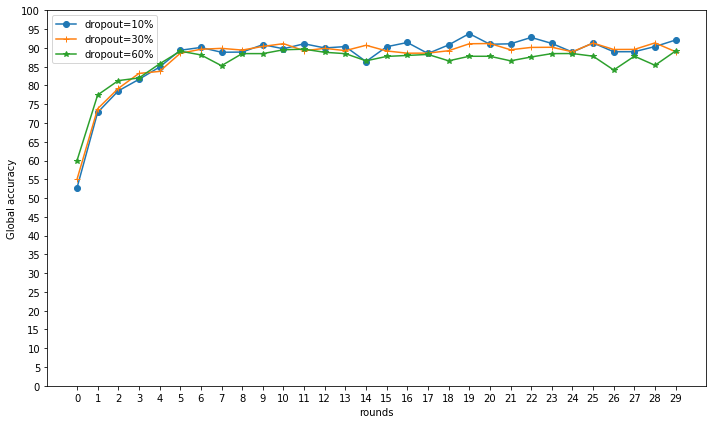

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df2 = pd.read_csv('../results/hybrid_drop10_nodes150/models.csv') 
df5 = pd.read_csv('../results/hybrid_drop30_nodes150/models.csv') 
df8 = pd.read_csv('../results/hybrid_drop60_nodes150/models.csv')   # Replace 'your_csv_file.csv' with your actual file name
df52 = pd.read_csv('../results/score_alpha02_nodes50/models.csv') 
df55 = pd.read_csv('../results/score_alpha05_nodes50/models.csv') 
df58 = pd.read_csv('../results/score_alpha08_nodes50/models.csv')  # Replace 'your_csv_file.csv' with your actual file name


# Filter rows with type=2
filtered_df2 = df2[df2['type'] == 2]
filtered_df2 = filtered_df2[1:]

filtered_df5 = df5[df5['type'] == 2]
filtered_df5 = filtered_df5[1:]

filtered_df8 = df8[df8['type'] == 2]
filtered_df8 = filtered_df8[1:]

filtered_df52 = df52[df52['type'] == 2]
filtered_df52 = filtered_df52[1:]

filtered_df55 = df55[df55['type'] == 2]
filtered_df55 = filtered_df55[1:]

filtered_df58 = df58[df58['type'] == 2]
filtered_df58 = filtered_df58[1:]

# Extract accuracy values
accuracies2 = filtered_df2['accuracy']
accuracies5 = filtered_df5['accuracy']
accuracies8 = filtered_df8['accuracy']

accuracies52 = filtered_df52['accuracy']
accuracies55 = filtered_df55['accuracy']
accuracies58 = filtered_df58['accuracy']

index = filtered_df2['round']

print(accuracies2)
# print(accuracies52)

print(accuracies5)
# print(accuracies55)

print(accuracies8)
# print(accuracies58)
# print(accuracies)
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(index, accuracies2, marker='o', label="dropout=10%")
plt.plot(index, accuracies5, marker='+', label="dropout=30%")
plt.plot(index, accuracies8, marker='*', label="dropout=60%")
# plt.plot(index, accuracies52, marker='o', label="α=0.2 50")
# plt.plot(index, accuracies55, marker='+', label="α=0.5 50")
# plt.plot(index, accuracies58, marker='*', label="α=0.8 50")
# plt.title('FL performance with score selection')
plt.xlabel('rounds')
plt.ylabel('Global accuracy')
plt.yticks(range(0, 101, 5))
plt.xticks(range(0,30, 1))
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
import json
import numpy as np
with open("../results/scenario1/drl/drl_300/blockchain.json",'r') as f:
    data = json.load(f)

In [3]:
# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

# Print honesty values for each node in a single line
for node_id in range(0, 50):  # Assuming node IDs are from 1 to 100
    if node_id in honesty_values_dict:
        honesty_list = honesty_values_dict[node_id]
        if len(honesty_list)==7 :
            honesty_list.append(honesty_list[-1])
        print(f"Node {node_id}: {honesty_list}")
    else:
        print(f"Node {node_id}: No honesty values")


Node 0: [0.0, 0.945, 0.945, 2.778, 2.778, 2.778, 2.778, -7.222, -7.222, -17.222, -16.223, -16.223, -16.223, -16.223, -26.223, -26.223, -26.223, -36.223, -46.223, -78.608, -118.313, -123.513, -123.513, -123.513, -121.513, -121.513, -121.513, -131.513, -131.513, -131.513]
Node 1: [0.0, 0.958, 0.958, 0.958, 0.958, -9.042, -9.042, -19.042, -18.043, -18.043, -18.043, -28.043, -38.043, -38.043, -38.043, -38.043, -38.043, -38.043, -38.043, -37.043, -37.043, -37.043, -37.043, -37.043, -37.043, -36.043, -36.043, -35.043, -45.043, -47.043]
Node 2: [0.0, 0.948, -9.052, -57.757, -57.757, -57.757, -55.757, -60.257, -60.257, -58.59, -62.59, -72.59, -70.923, -80.923, -78.923, -77.923, -77.923, -83.923, -81.923, -91.923, -101.923, -111.923, -109.923, -108.923, -108.923, -106.923, -105.923, -115.923, -125.923, -176.293]
Node 3: [0.0, 0.0, -46.575, -45.576, -45.576, -45.576, -45.576, -80.436, -80.436, -80.436, -80.436, -80.436, -90.436, -90.436, -90.436, -90.436, -90.436, -89.436, -89.436, -89.436, -89.

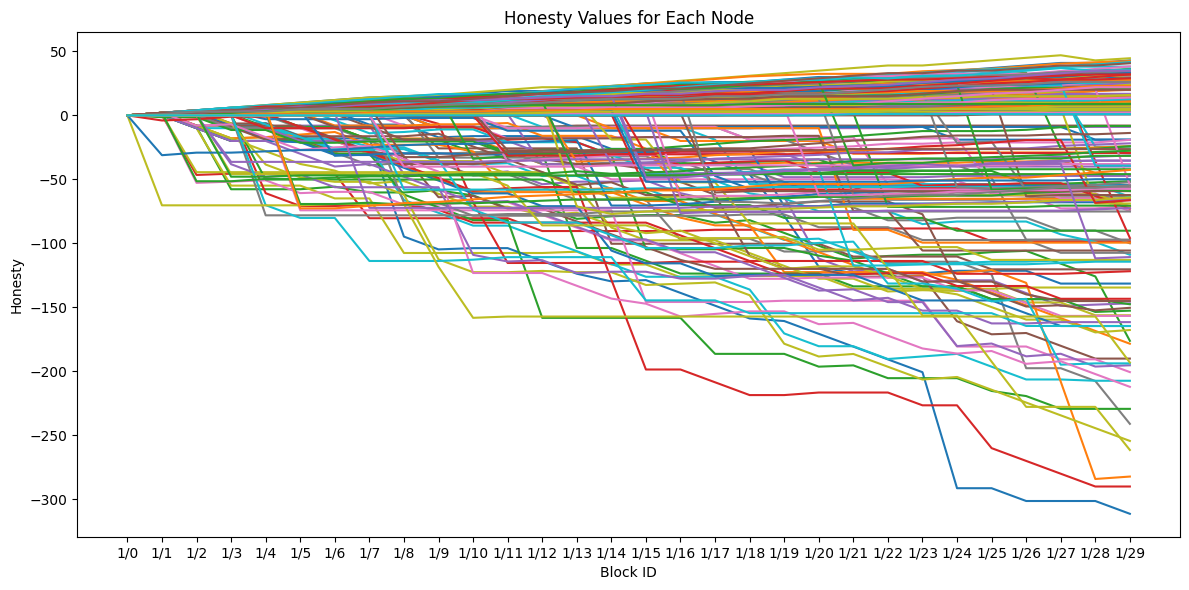

In [4]:
import matplotlib.pyplot as plt

# Specify the node IDs you want to include on the plot
# specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())

block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, honesty_values, label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
# plt.legend()
# plt.xticks(rotation=45)

# y_ticks = np.arange(-15, 11, 1)
# y_tick_labels = [f'{tick:.0f}' for tick in y_ticks]
# plt.yticks(y_ticks, y_tick_labels)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()

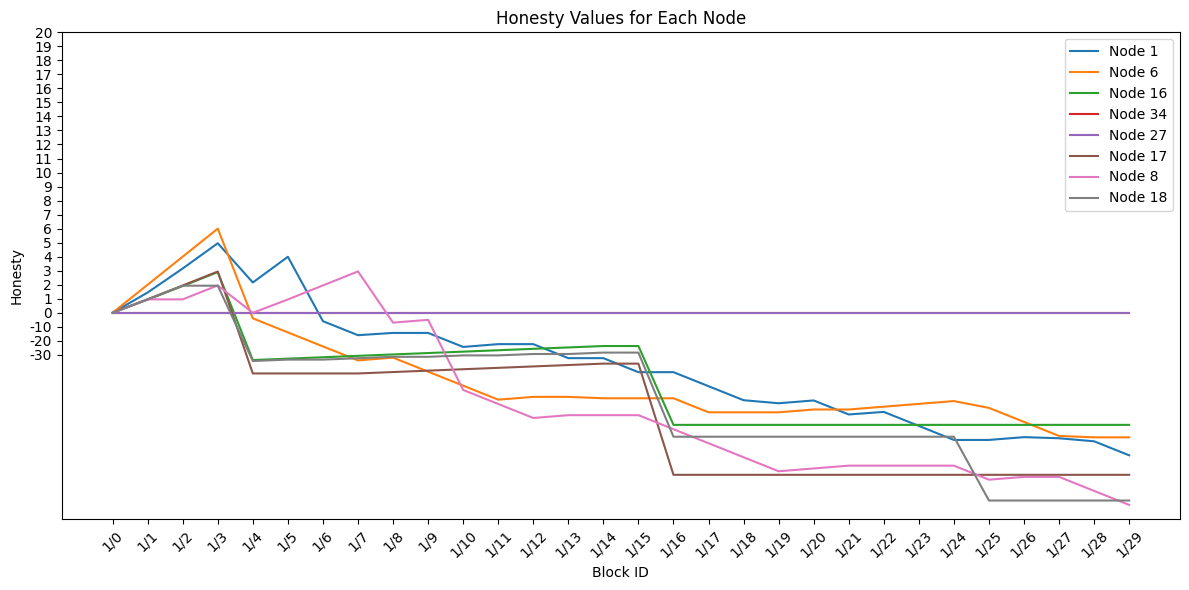

In [9]:
y = [-3, -2, -1, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_ticks = [-30, -20,-10, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  # Custom y-axis tick values


def process_y_values(y_values):
    return [y / 10 if y < 0 else y for y in y_values]



specific_node_ids = [1,6,16,34,27,17,8,18]  

# Prepare data for plotting
# node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in specific_node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, process_y_values(honesty_values), label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(y, y_ticks)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()